In [215]:
# importing numpy as np
import numpy as np
import pandas as pd
 
# importing pyplot as plt
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import genextreme as gev



In [216]:
# Simulate Maximum annual temperatures 
years = 30
extrem_days = 10
annual_T_max = []
data = np.array([])
for y in range(1,years+1,1): 
    # size = days per year
    size = 365
    # mean annual temperature
    pos = 15 
    # standard deviation of daily temperature for simulating annual temp distribution 
    scale = 4
    
    annual_T1 = np.random.normal(pos, scale, size-extrem_days)
    annual_T2 = np.random.normal(pos+5, scale+1, extrem_days)
    
    annual_T = np.concatenate((annual_T1, annual_T2))
    annual_T_max.append(max(annual_T))

    data = np.concatenate((data, annual_T))

In [217]:
# Create a date range for the days
date_range = pd.date_range(start='1950-01-01', periods=365*years, freq='D')
# Create a DataFrame for better organization and visualization
df = pd.DataFrame({'Date': date_range, 'DailyRecords': data})

In [218]:
# Fit a normal distribution to the daily records:
mu, std = norm.fit(df['DailyRecords'])

Text(0, 0.5, 'Frequency')

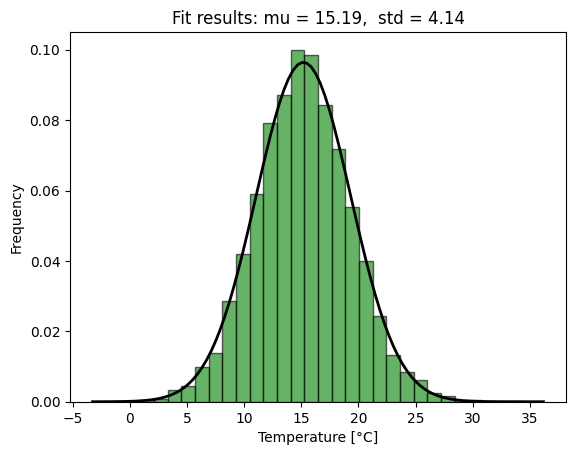

In [219]:
# Create histogram
plt.hist(df['DailyRecords'], bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the fitted function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.title(f'Fit results: mu = {mu:.2f},  std = {std:.2f}')
plt.xlabel('Temperature [°C]')
plt.ylabel('Frequency')

In [220]:
event_threshold = 30 #°C
p_daily = 1 - norm(mu,std).cdf(event_threshold)
p_annual = 1 - (1 - p_daily)**365
return_period_model = 1/p_annual

print(return_period_model)

16.49390263661798


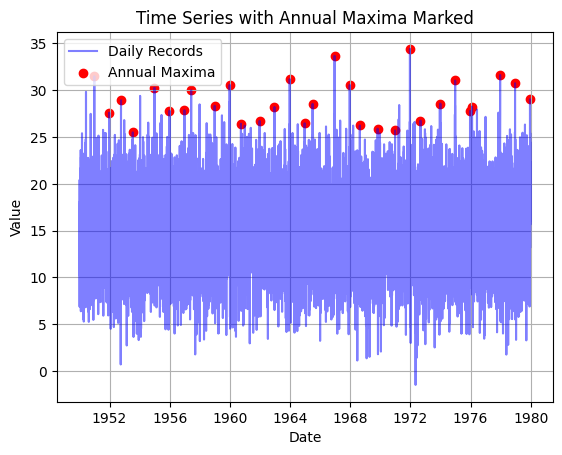

In [221]:
# Extract the annual maxima 

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Find annual maxima and corresponding dates
annual_maxima = df.loc[df.groupby('Year')['DailyRecords'].idxmax()]

# Plot the time series
plt.plot(df['Date'], df['DailyRecords'], label='Daily Records', linestyle='-', color='b', alpha=0.5)
# Mark the annual maxima on the plot
plt.scatter(annual_maxima['Date'], annual_maxima['DailyRecords'], color='red', marker='o', label='Annual Maxima')
plt.title('Time Series with Annual Maxima Marked')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [222]:
gev_shape, gev_loc, gev_scale = gev.fit(annual_maxima['DailyRecords'])

Text(0, 0.5, 'Frequency')

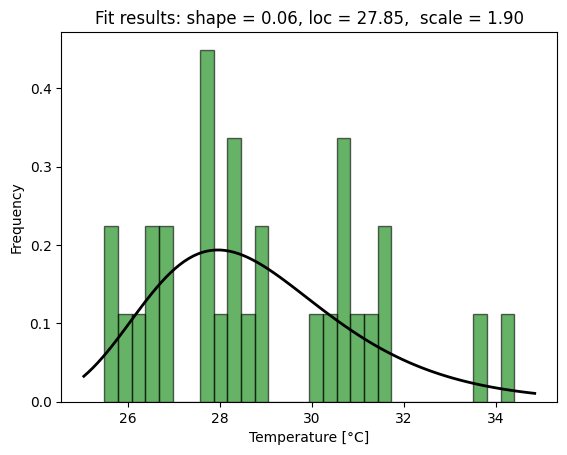

In [223]:
# Create histogram
plt.hist(annual_T_max, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the fitted function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gev(gev_shape,gev_loc,gev_scale).pdf(x)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.title(f'Fit results: shape = {gev_shape:.2f}, loc = {gev_loc:.2f},  scale = {gev_scale:.2f}')
plt.xlabel('Temperature [°C]')
plt.ylabel('Frequency')

In [224]:
p_annual_extrem = 1 - gev(gev_shape,gev_loc,gev_scale).cdf(event_threshold)
return_period_extrem = 1/p_annual_extrem
print(return_period_extrem)

3.7407151522921365
